# Alex Barkovitch CMP 262 SQL Exercise
## For this exercise, I will be using an sqlite file containing data stats for pro league Valorant games.

In [1]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Connect to SQL database.

In [2]:
connection = sqlite3.connect('valorant.sqlite')

### Let's look at the tables contained in our file.

In [3]:
query = "SELECT name FROM main.sqlite_master WHERE type='table' ORDER BY name; "
tables = pd.read_sql_query(query, connection)
tables

,name
0,Game_Rounds
1,Game_Scoreboard
2,Games
3,Matches


### Create a cursor object and a function to execute SQL queries and return a dataframe of the query. 

In [4]:
# create a cursor object
cur = connection.cursor()
# function returns our query as a dataframe
def to_df(query):
    # execute SQL query
    cur.execute(query)
    # get the rows from the table
    rows = cur.fetchall()
    # get the columns from the table
    columns = [col[0] for col in cur.description]
    # return data as a dataframe
    return pd.DataFrame(rows, columns=columns)

# Now let's see what data is contained in each table.

In [5]:
# dataframe of the Game_Rounds table
query1 = """
SELECT * 
FROM Game_Rounds 
ORDER BY GameID DESC;
"""
game_rounds = to_df(query1)
game_rounds

,GameID,Team1ID,Team2ID,RoundHistory
0,9998,497,1736,"{1: {'RoundWinner': 'EX-F', 'ScoreAfterRound':..."
1,9997,497,1736,"{1: {'RoundWinner': 'EX-F', 'ScoreAfterRound':..."
2,9995,624,1737,"{1: {'RoundWinner': 'PRX', 'ScoreAfterRound': ..."
3,9994,624,1737,"{1: {'RoundWinner': 'IV', 'ScoreAfterRound': '..."
4,9993,880,694,"{1: {'RoundWinner': 'MITH', 'ScoreAfterRound':..."
...,...,...,...,...
15526,,647,756,None
15527,,747,748,None
15528,,749,750,None
15529,,752,753,None


In [6]:
# dataframe of the Game_Scoreboard table
query2 = """
SELECT * 
FROM Game_Scoreboard 
ORDER BY GameID DESC;
"""
game_scoreboard = to_df(query2)
game_scoreboard

,GameID,PlayerID,PlayerName,TeamAbbreviation,Agent,ACS,Kills,Deaths,Assists,PlusMinus,...,Num_4Ks,Num_5Ks,OnevOne,OnevTwo,OnevThree,OnevFour,OnevFive,Econ,Plants,Defuses
0,9998,3401,PTC,AAA,jett,282.0,20.0,11.0,5.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,1.0,1.0
1,9998,1910,Acetics,AAA,sova,233.0,18.0,12.0,3.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,3.0,0.0
2,9998,1908,kongared,AAA,cypher,228.0,18.0,14.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0,0.0
3,9998,1912,wannafly,AAA,omen,226.0,15.0,15.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0
4,9998,1909,JinNy,AAA,breach,135.0,10.0,11.0,2.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157934,10003,3401,PTC,AAA,phoenix,277.0,27.0,22.0,2.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,0.0,1.0
157935,10003,1912,wannafly,AAA,raze,217.0,18.0,22.0,7.0,-4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,2.0,2.0
157936,10003,1908,kongared,AAA,cypher,205.0,20.0,21.0,4.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,5.0,0.0
157937,10003,1910,Acetics,AAA,sova,146.0,12.0,20.0,10.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,2.0,0.0


In [7]:
# dataframe of the Games table
query3 = """
SELECT * 
FROM Games 
ORDER BY GameID DESC;
"""
games = to_df(query3)
games

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,9998,6029,Ascent,497,1736,Attack All Around,ex-FULL SENSE,Attack All Around,13,8,...,11.0,1.0,3.0,2.0,0.0,0.0,5.0,1.0,13.0,5.0
1,9997,6029,Split,497,1736,Attack All Around,ex-FULL SENSE,Attack All Around,13,6,...,9.0,1.0,3.0,1.0,1.0,0.0,5.0,3.0,10.0,2.0
2,9995,6028,Split,624,1737,Paper Rex,InnerVoice,Paper Rex,13,5,...,8.0,1.0,4.0,1.0,0.0,0.0,6.0,2.0,8.0,2.0
3,9994,6028,Bind,624,1737,Paper Rex,InnerVoice,Paper Rex,13,6,...,8.0,1.0,3.0,1.0,1.0,0.0,7.0,1.0,8.0,4.0
4,9993,6027,Ascent,880,694,MiTH.Attitude,Bren Esports,MiTH.Attitude,13,5,...,9.0,1.0,3.0,1.0,1.0,1.0,5.0,2.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15883,10007,6034,Haven,685,1190,HSDIRR,MJAOMODE,MJAOMODE,11,13,...,8.0,1.0,2.0,1.0,2.0,0.0,8.0,5.0,12.0,7.0
15884,10006,6034,Ascent,685,1190,HSDIRR,MJAOMODE,HSDIRR,13,9,...,6.0,1.0,3.0,1.0,1.0,0.0,10.0,5.0,8.0,3.0
15885,10005,6031,Split,694,497,Bren Esports,Attack All Around,Attack All Around,0,13,...,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,10.0,10.0
15886,10004,6031,Haven,694,497,Bren Esports,Attack All Around,Bren Esports,13,11,...,7.0,0.0,4.0,1.0,2.0,0.0,2.0,1.0,16.0,9.0


In [8]:
# dataframe of the Matches table 
query4 = """
SELECT * 
FROM Matches 
ORDER BY MatchID DESC;
"""
matches = to_df(query4)
matches

,MatchID,Date,Patch,EventID,EventName,EventStage,Team1ID,Team2ID,Team1,Team2,Team1_MapScore,Team2_MapScore
0,9998,2021-02-09 03:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Round of 16,2559,1334,SPEAR GAMING,Team NoX,2,0
1,9997,2021-02-09 00:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Round of 16,2766,2556,Jesfrelho,Gehenna Sweepers,2,1
2,9996,2021-02-09 00:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Round of 16,2806,2571,GoNGo Prince,Lunatic-Hai,2,0
3,9995,2021-02-09 00:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Round of 16,1970,2552,TNL Esports,Bulldozer Gaming,2,0
4,9993,2021-02-05 15:00:00,Patch 2.02Running accuracy changes,308,FEL Valorant Cup #2,Main Event: Upper Quarterfinals,2768,480,Ahlman Esports,Quickmath,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7813,10005,2021-02-09 06:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Quarterfinals,2328,2546,NUTURN,Hamtori ZunDeZinx,2,0
7814,10003,2021-02-09 06:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Quarterfinals,2806,2766,GoNGo Prince,Jesfrelho,2,0
7815,10001,2021-02-09 03:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Round of 16,2546,2557,Hamtori ZunDeZinx,Saviors,2,0
7816,10000,2021-02-09 03:00:00,Patch 2.02Running accuracy changes,307,Champions Tour Korea Stage 1: Challengers 2,Open Qualifier: Round of 16,2328,1670,NUTURN,F4Q,2,1


# Pull more specific data relevant to our questions into separate dataframes for analysis.
# Questions 1: What are the average KDA's of each team? Which team has the best KDA?
## To answer this question, we'll use an SQL query to get the teams and their average values for kills, deaths, and assists for each match, grouped together by team. Create a plot of the data.

In [9]:
# create a dataframe containing the team, average kills, average deaths, and average assists
query5 = """
SELECT TeamAbbreviation, AVG(Kills) AS AvgKills, AVG(Deaths) AS AvgDeaths, AVG(Assists) AS AvgAssists
FROM Game_Scoreboard
GROUP BY TeamAbbreviation;
"""
kda = to_df(query5)
kda

,TeamAbbreviation,AvgKills,AvgDeaths,AvgAssists
0,,12.586904,13.954729,4.594584
1,+22,10.440000,14.160000,3.160000
2,+WP,15.266667,16.200000,5.533333
3,-she,14.350000,13.900000,4.600000
4,0.5,15.507692,13.758974,5.312821
...,...,...,...,...
2006,świ,14.387097,14.483871,4.580645
2007,СС,14.864322,14.643216,5.115578
2008,레.,21.600000,18.800000,7.200000
2009,뽕TLP,11.000000,17.500000,0.500000


### Clean the data by removing non-ascii charaters, null values, and values equal to zero.

In [10]:
# remove any rows with non-ascii characters in the team abbreviation
kda = kda[kda['TeamAbbreviation'].map(lambda x: x.isascii())]
kda

,TeamAbbreviation,AvgKills,AvgDeaths,AvgAssists
0,,12.586904,13.954729,4.594584
1,+22,10.440000,14.160000,3.160000
2,+WP,15.266667,16.200000,5.533333
3,-she,14.350000,13.900000,4.600000
4,0.5,15.507692,13.758974,5.312821
...,...,...,...,...
1998,xd,15.522581,15.096774,4.961290
1999,zTit,8.600000,14.800000,3.600000
2000,zaze,9.800000,10.400000,2.850000
2001,zest,9.900000,15.300000,3.700000


In [11]:
# drop null and values equal to 0
kda.dropna(how = 'any', inplace = True)
kda = kda[(kda != 0).all(axis = 1)]
kda

C:\Users\alexb\AppData\Local\Temp\ipykernel_16000\3776988689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda.dropna(how = 'any', inplace = True)


,TeamAbbreviation,AvgKills,AvgDeaths,AvgAssists
0,,12.586904,13.954729,4.594584
1,+22,10.440000,14.160000,3.160000
2,+WP,15.266667,16.200000,5.533333
3,-she,14.350000,13.900000,4.600000
4,0.5,15.507692,13.758974,5.312821
...,...,...,...,...
1998,xd,15.522581,15.096774,4.961290
1999,zTit,8.600000,14.800000,3.600000
2000,zaze,9.800000,10.400000,2.850000
2001,zest,9.900000,15.300000,3.700000


### Calculate the KDA ratio by dividing the sum of kills + assists by the number of deaths for our plot.

In [12]:
# calculate the KDA for each team rounded to 2 decimal places
kda['KDA'] = (kda['AvgKills'] + kda['AvgAssists']) / kda['AvgDeaths']
kda['KDA'] = kda['KDA'].round(2)
kda

C:\Users\alexb\AppData\Local\Temp\ipykernel_16000\1955294291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda['KDA'] = (kda['AvgKills'] + kda['AvgAssists']) / kda['AvgDeaths']
C:\Users\alexb\AppData\Local\Temp\ipykernel_16000\1955294291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kda['KDA'] = kda['KDA'].round(2)


,TeamAbbreviation,AvgKills,AvgDeaths,AvgAssists,KDA
0,,12.586904,13.954729,4.594584,1.23
1,+22,10.440000,14.160000,3.160000,0.96
2,+WP,15.266667,16.200000,5.533333,1.28
3,-she,14.350000,13.900000,4.600000,1.36
4,0.5,15.507692,13.758974,5.312821,1.51
...,...,...,...,...,...
1998,xd,15.522581,15.096774,4.961290,1.36
1999,zTit,8.600000,14.800000,3.600000,0.82
2000,zaze,9.800000,10.400000,2.850000,1.22
2001,zest,9.900000,15.300000,3.700000,0.89


In [13]:
# sort by descending average kills
kda = kda.sort_values(by='KDA', ascending=False)
kda

,TeamAbbreviation,AvgKills,AvgDeaths,AvgAssists,KDA
784,JF,6.750000,2.000000,1.875,4.31
923,LilB,13.166667,5.166667,5.500,3.61
286,CFA,15.750000,7.250000,6.250,3.03
218,BSTL,14.000000,5.800000,3.000,2.93
30,3BL,14.200000,7.400000,5.300,2.64
...,...,...,...,...,...
473,EZBa,3.800000,13.800000,1.200,0.36
1352,Rena,3.750000,13.500000,1.000,0.35
1639,Turg,3.800000,13.600000,1.000,0.35
1126,Noxu,3.200000,13.000000,1.200,0.34


### Get the top 10 highest and top 10 lowest KDA values.

In [14]:
# 10 highest KDAs at the bottom of the dataframe
kda_top = kda.head(10)
# 10 lowest KDAs at the top of the dataframe
kda_bottom = kda.tail(10)
# concatenate the two dataframes
kda_stats = pd.concat([kda_top, kda_bottom])
kda_stats

,TeamAbbreviation,AvgKills,AvgDeaths,AvgAssists,KDA
784,JF,6.750000,2.000000,1.875000,4.31
923,LilB,13.166667,5.166667,5.500000,3.61
286,CFA,15.750000,7.250000,6.250000,3.03
218,BSTL,14.000000,5.800000,3.000000,2.93
30,3BL,14.200000,7.400000,5.300000,2.64
1369,Run,14.800000,8.200000,6.800000,2.63
1916,iCEG,15.400000,9.000000,7.200000,2.51
1035,Must,14.400000,8.300000,6.000000,2.46
60,AAO,13.500000,7.400000,4.300000,2.41
966,MJKL,15.066667,9.233333,6.400000,2.32


## Create a subplot displaying charts of the best and worst KDAs side by side.

Text(0, 0.5, 'Team')

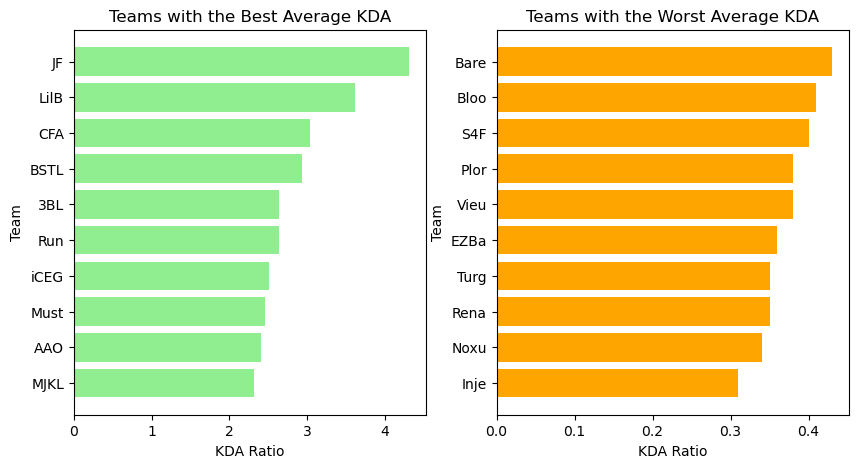

In [15]:
# sort the dataframes so the plots show teams from highest to lowest values
kda_top = kda_top.sort_values(by='KDA', ascending=True)
kda_bottom = kda_bottom.sort_values(by='KDA', ascending=True)

# create subplots to compare plots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# plot the 10 teams with the best KDA ratio
axes[0].barh(kda_top['TeamAbbreviation'], kda_top['KDA'], color='lightgreen')
axes[0].set_title('Teams with the Best Average KDA')
axes[0].set_xlabel('KDA Ratio')
axes[0].set_ylabel('Team')

# plot the 10 teams with the worst KDA ratio
axes[1].barh(kda_bottom['TeamAbbreviation'], kda_bottom['KDA'], color='orange')
axes[1].set_title('Teams with the Worst Average KDA')
axes[1].set_xlabel('KDA Ratio')
axes[1].set_ylabel('Team')

## A bar graph which lets you better compare directly the best and worst KDAs.

Text(0, 0.5, 'Team Abbreviation')

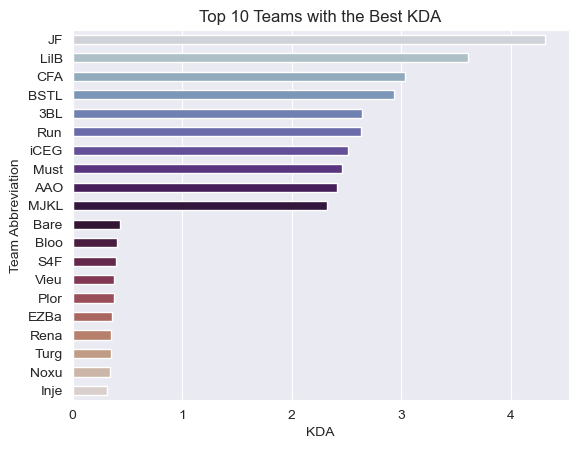

In [16]:
# set figure size and style
sns.set_style('darkgrid')
# create a bar chart of the top 1- players with most kills, colored by team
ax = sns.barplot(x="KDA", y="TeamAbbreviation", data=kda_stats, width=0.5, errorbar=None, orient='h', palette= 'twilight')
# set the title and labels for axis and legend
plt.title("Top 10 Teams with the Best KDA")
plt.xlabel('KDA')
plt.ylabel('Team Abbreviation')

## Conclusion: JF is the team with the highest KDA value, and it's much higher than any of the others. Having a KDA over 4 means they have gotten over 4 kills for every death in the game. JF's KDA is almost twice as high as the 10th highest KDA team which is incredible. Inje has the lowest KDA, at 0.31. All of the lowest 10 have less than a 0.5, which means they're dying twice as often as they're getting kills. If I were a pro player, I probably wouldn't want to join one of those teams.
# Question 2: What teams have the most wins?
## For this query, count instances of each team in the winner column and return the value as total wins next to the team name.

In [17]:
# create a dataframe with how many wins each team has
query6 = """
SELECT Winner as Team, COUNT(*) AS TotalWins
FROM Games
GROUP BY Winner
ORDER BY TotalWins DESC
LIMIT 20;
"""
team_wins = to_df(query6)
team_wins

,Team,TotalWins
0,Renegades,192
1,Sentinels,178
2,TSM,171
3,Immortals,146
4,Cloud9,146
5,Soniqs,134
6,Gen.G,133
7,Envy,126
8,Complexity,125
9,G2 Esports,118


## Conclusion: For this question, we were able to get everything we needed directly from the SQL query. It shows each teams total wins. It's a bit hard for me to relate the full team name to the abbreviation, and unfortunately the different tables only had one or the other, so it's a bit hard to compare this list with the KDA averages. It does look like none of these teams are among the top 10 KDA values, which is interesting. I wonder if these teams are winning their games by planting and defusing more often than eliminating the other team.
# Question 3: What players have the highest number of kills?
## To answer this question, we'll have the SQL query do most of the work. Have it count the total number of kills for each player, the number of matches for each player, and calculate the average kills per match. Sort the dataframe by descending order of matches played so we can get the top 20 players with the most matches. We want to look at players who have played the most games because it'll have a more weighted average.

In [18]:
# create a dataframe with the player name, number of matches, total kills, and kills per match from SQL query
query7 = """
SELECT PlayerName, COUNT(*) AS MatchesPlayed, SUM(Kills) AS TotalKills, SUM(Kills) / COUNT(*) AS KillsPerMatch
FROM Game_Scoreboard
GROUP BY PlayerName
ORDER BY MatchesPlayed DESC
LIMIT 50;
"""
kills = to_df(query7)
kills

,PlayerName,MatchesPlayed,TotalKills,KillsPerMatch
0,randyySAVAGE,297,4360,14
1,RetrQ,295,4783,16
2,Bob,258,3350,12
3,Stronglegs,251,3390,13
4,iyen,250,3614,14
5,Crunchy,250,3898,15
6,dizzyLife,247,4114,16
7,HUYNH,245,3499,14
8,dapr,242,3548,14
9,SicK,240,3997,16


In [19]:
# now we can sort the players in order of descending kills per match
kills = kills.sort_values(by='KillsPerMatch', ascending=False)
kills

,PlayerName,MatchesPlayed,TotalKills,KillsPerMatch
43,TenZ,192,3684,19
25,Asuna,217,3698,17
17,WARDELL,224,3875,17
22,ScrewFace,222,3815,17
49,jcrueL,184,3199,17
16,Winsum,228,3850,16
11,ShahZaM,239,3881,16
1,RetrQ,295,4783,16
32,mina,206,3367,16
35,thief,204,3343,16


## Create a bar chart of the results

Text(0, 0.5, 'Player Name')

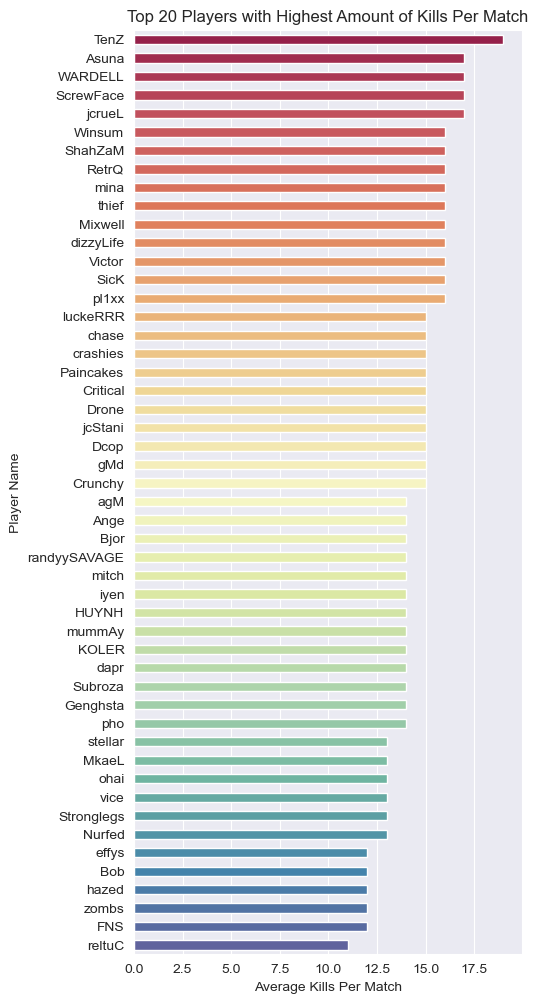

In [20]:
# set figure size and style
plt.figure(figsize=(5, 12))
sns.set_style('darkgrid')
# create a bar chart of the top 1- players with most kills, colored by team
ax = sns.barplot(x="KillsPerMatch", y="PlayerName", data=kills, width=0.5, errorbar=None, orient='h', palette= 'Spectral')
# set the title and labels for axis
plt.title("Top 20 Players with Highest Amount of Kills Per Match")
plt.xlabel('Average Kills Per Match')
plt.ylabel('Player Name')

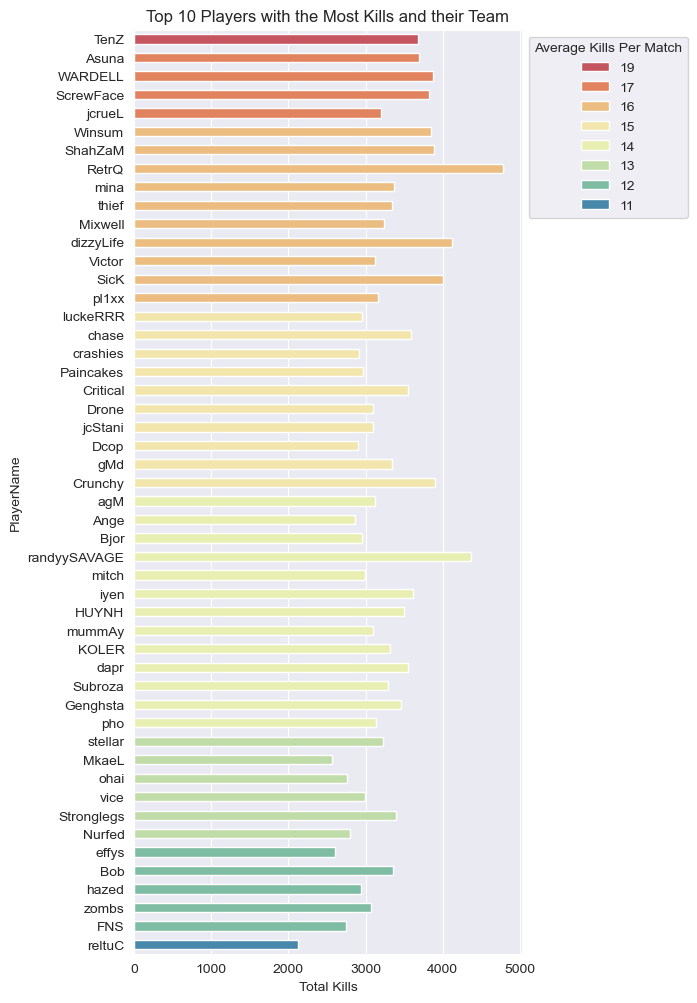

In [21]:
# convert kills per match values to string type so we can use it as our hue in our next plot
kills['KillsPerMatch'] = kills['KillsPerMatch'].astype(str)

# set figure size and style
plt.figure(figsize=(5, 12))
sns.set_style('darkgrid')
# create a bar chart of the top 1- players with most kills, colored by team
ax = sns.barplot(x="TotalKills", y="PlayerName", hue = 'KillsPerMatch', data=kills, width=0.5, errorbar=None, orient='h', dodge=False, palette= 'Spectral')
# set the title and labels for axis and legend
plt.title("Top 10 Players with the Most Kills and their Team")
plt.xlabel('Total Kills')
plt.ylabel('PlayerName')
plt.legend(title='Average Kills Per Match', bbox_to_anchor=(1, 1), loc='upper left')

## Conclusion: Here we can see that RetrQ and randyySAVAGE have the most kills of any Valorant pro player. They have probably been playing this game for a very long time, but they don't have as many kills per match as TenZ, who has more than any other players on this list.
# Question 4: What players/teams have the most plants/defuses?
### To answer this, use an SQL query to get the each players amount of games and total number of plants and defuses. Group by each player and display the top players with the most plants + defuses.

In [31]:
# create a dataframe with player name, team, and number of plants and defuses
query8 = """
SELECT PlayerName, COUNT(*) AS MatchesPlayed, SUM(Plants) AS TotalPlants, SUM(Defuses) AS TotalDefuses 
FROM Game_Scoreboard
GROUP BY PlayerName
ORDER BY MatchesPlayed DESC;
"""
plants = to_df(query8)
plants

ProgrammingError: Cannot operate on a closed database.

### Clean the data by dropping rows that contain non-ascii charaters or null values.

In [32]:
# check if names contains ascii characters
plants = plants[plants['PlayerName'].map(lambda x: x.isascii())]
# drop null and values equal to 0
plants.dropna(how = 'any', inplace = True)
#plants = plants[(plants != 0).all(axis = 1)]
plants

,PlayerName,MatchesPlayed,TotalPlants,TotalDefuses,Sum,PlantsPerMatch,DefusesPerMatch
0,randyySAVAGE,297,212.0,116.0,328.0,0.7,0.4
1,RetrQ,295,264.0,140.0,404.0,0.9,0.5
2,Bob,258,610.0,128.0,738.0,2.4,0.5
3,Stronglegs,251,974.0,101.0,1075.0,3.9,0.4
4,iyen,250,235.0,117.0,352.0,0.9,0.5
5,Crunchy,250,479.0,84.0,563.0,1.9,0.3
6,dizzyLife,247,194.0,117.0,311.0,0.8,0.5
7,HUYNH,245,231.0,90.0,321.0,0.9,0.4
8,dapr,242,231.0,71.0,302.0,1.0,0.3
9,SicK,240,517.0,103.0,620.0,2.2,0.4


In [33]:
# get the total number of plants and defuses so we can sort the data by sum
plants['Sum'] = plants['TotalPlants'] + plants['TotalDefuses']
# get the average plants per match and round to one decimal place
plants['PlantsPerMatch'] = plants['TotalPlants'] / plants['MatchesPlayed']
plants['PlantsPerMatch'] = plants['PlantsPerMatch'].round(1)
# get the average defuses per match and round to one decimal place
plants['DefusesPerMatch'] = plants['TotalDefuses'] / plants['MatchesPlayed']
plants['DefusesPerMatch'] = plants['DefusesPerMatch'].round(1)
plants

,PlayerName,MatchesPlayed,TotalPlants,TotalDefuses,Sum,PlantsPerMatch,DefusesPerMatch
0,randyySAVAGE,297,212.0,116.0,328.0,0.7,0.4
1,RetrQ,295,264.0,140.0,404.0,0.9,0.5
2,Bob,258,610.0,128.0,738.0,2.4,0.5
3,Stronglegs,251,974.0,101.0,1075.0,3.9,0.4
4,iyen,250,235.0,117.0,352.0,0.9,0.5
5,Crunchy,250,479.0,84.0,563.0,1.9,0.3
6,dizzyLife,247,194.0,117.0,311.0,0.8,0.5
7,HUYNH,245,231.0,90.0,321.0,0.9,0.4
8,dapr,242,231.0,71.0,302.0,1.0,0.3
9,SicK,240,517.0,103.0,620.0,2.2,0.4


In [34]:
# sort by descending plants + defuses sum
plants_bysum = plants.sort_values(by='Sum', ascending=False)
plants_bysum

,PlayerName,MatchesPlayed,TotalPlants,TotalDefuses,Sum,PlantsPerMatch,DefusesPerMatch
3,Stronglegs,251,974.0,101.0,1075.0,3.9,0.4
2,Bob,258,610.0,128.0,738.0,2.4,0.5
18,pho,223,580.0,85.0,665.0,2.6,0.4
15,stellar,231,557.0,73.0,630.0,2.4,0.3
9,SicK,240,517.0,103.0,620.0,2.2,0.4
5,Crunchy,250,479.0,84.0,563.0,1.9,0.3
12,Genghsta,238,384.0,115.0,499.0,1.6,0.5
1,RetrQ,295,264.0,140.0,404.0,0.9,0.5
10,zombs,239,327.0,37.0,364.0,1.4,0.2
13,chase,236,231.0,125.0,356.0,1.0,0.5


In [35]:
# keep only the top 20 rows of our sorted dataframe
plants_bysum = plants_bysum.head(20)
plants = plants.head(20)

In [36]:
# drop sum column as it's no longer relevant to our data
plants_bysum.drop(columns=['Sum'], inplace = True)
plants.drop(columns=['Sum'], inplace = True)
plants_bysum

C:\Users\alexb\AppData\Local\Temp\ipykernel_16000\2321964649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plants_bysum.drop(columns=['Sum'], inplace = True)
C:\Users\alexb\AppData\Local\Temp\ipykernel_16000\2321964649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plants.drop(columns=['Sum'], inplace = True)


,PlayerName,MatchesPlayed,TotalPlants,TotalDefuses,PlantsPerMatch,DefusesPerMatch
3,Stronglegs,251,974.0,101.0,3.9,0.4
2,Bob,258,610.0,128.0,2.4,0.5
18,pho,223,580.0,85.0,2.6,0.4
15,stellar,231,557.0,73.0,2.4,0.3
9,SicK,240,517.0,103.0,2.2,0.4
5,Crunchy,250,479.0,84.0,1.9,0.3
12,Genghsta,238,384.0,115.0,1.6,0.5
1,RetrQ,295,264.0,140.0,0.9,0.5
10,zombs,239,327.0,37.0,1.4,0.2
13,chase,236,231.0,125.0,1.0,0.5


In [37]:
plants

,PlayerName,MatchesPlayed,TotalPlants,TotalDefuses,PlantsPerMatch,DefusesPerMatch
0,randyySAVAGE,297,212.0,116.0,0.7,0.4
1,RetrQ,295,264.0,140.0,0.9,0.5
2,Bob,258,610.0,128.0,2.4,0.5
3,Stronglegs,251,974.0,101.0,3.9,0.4
4,iyen,250,235.0,117.0,0.9,0.5
5,Crunchy,250,479.0,84.0,1.9,0.3
6,dizzyLife,247,194.0,117.0,0.8,0.5
7,HUYNH,245,231.0,90.0,0.9,0.4
8,dapr,242,231.0,71.0,1.0,0.3
9,SicK,240,517.0,103.0,2.2,0.4


## Conclusion: Out of 251 matches, Stronglegs has gotten a total of 974 plants down. That averages to 3.9 plants per match, which is actually a lot for this game. They're 1st in this list, with twice as many plants per match as the 5th person on the list, which goes to show how rare it is to sucessfully get a plant down. This data also tells you that defusing is incredibly difficult, which makes sense. I've played Valorant before and it's not often someone plants the defuser, and sucessfully defusing it is even harder. When looking at the plants per match of the players with the most games played, the top 2 have less than one plant per match; which shows that there are many games that they don't plant at all, but as these two players are the players with some of the highest KDAs in pro league, they probably don't need to plant as they win the game by eliminations. I would also imagine that Stronglegs probably doesn't have that high of a KDA.
### Close the connection to SQL database.

In [29]:
# close the connection
connection.close()